<a href="https://colab.research.google.com/github/jmamath/Ressources/blob/master/TutoAutoGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction à la différentiation automatique

Google Colab, est un outil permettant d'exécuter des cellules de code Python. L'avantage est que la plupart des librairies pour faire du traitement de données sont déjà installés. C'est donc intéressant pour faire des analyses en lignes et les partager sans avoir eu besoin d'installer soi même les outils sur une machine locale. Par exemple, on veux générer quelques données dont on se servira pour illustrer les réseaux résiduels et les réseaux continus. Pour cela on importe deux librairies, `numpy` pour effectuer des opérations d'algèbre linéaire en parallèle sur le CPU, et `matplotilb` pour tracer les fonctions. Pour éxécuter une cellule de code: cliquez sur la cellule, et appuyez sur `shift`+`enter`.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

## Différentiation automatique avec Pytorch

Pour pouvoir apprendre, nous aurons besoin d'une librairie permettant la différentiation automatique. On va utiliser Pytorch, qui est une distribution open source, soutenu par Facebook notamment.

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import autograd

Le cœur de l'apprentissage profond est la différentiation automatique, on va l'illustrer avec le module `autograd`. En calculant les dérivées de polynomes usuels $p_{2}(x) = x^{2}, \, p_{3}(x) = x^{3}$

In [0]:
p2 = np.power(x,2)
p3 = np.power(x,3)

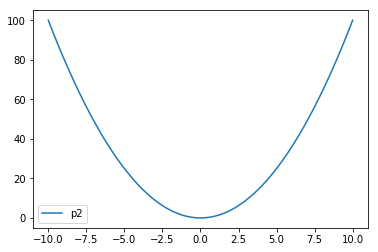

In [9]:
plt.plot(x,p2,label='p2')
plt.legend()

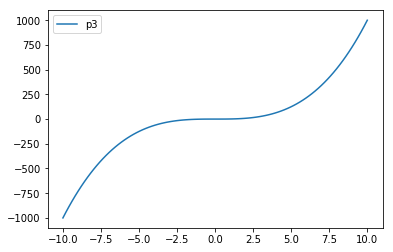

In [10]:
plt.plot(x,p3,label='p3')
plt.legend()

Les dérivées analytiques sont $\dot p_{2}(x) = 2x$ et $\dot p_{3}(x) = 3x^{2}$.

In [0]:
dp2 = 2*x
dp3 = 3*np.power(x,2)

Maintenant calculont les dérivées automatiquement et comparons les aux fonctions définies ci-dessus. Pour cela, il faudra stocker toutes les données en utilisant des tenseurs de pytorch. Pytorch permet d'effectuer les calculs directement sur un GPU d'il y en a un de disponible. En réalité, torch va suivre le flot de calculs avec un graphe, et stocker toutes les opérations effectuées sur ses tenseurs. Si on veut pouvoir différentier par rapport à un tenseur on q besoin de spécifer `requires_grad=True`. En effet cela coûte de la mémoire.

In [0]:
x_ = torch.tensor(x,requires_grad=True)
p2_ = torch.pow(x_,2)
p3_ = torch.pow(x_,3)

On peut consulter les dimensions de nos tenseurs avec le mot clé `shape`

In [40]:
p3_.shape

torch.Size([100, 1])

L'accès aux éléments se fait comme pour les listes. Donc, pour avoir accès aux cinq premiers éléments on éxécute comme suit:

In [41]:
x_[:5]

tensor([[-10.0000],
        [ -9.7980],
        [ -9.5960],
        [ -9.3939],
        [ -9.1919]], dtype=torch.float64, grad_fn=<SliceBackward>)

Vous l'aurez compris les représentations de $X$ et $p_{2}$ sont tensorielles, i.e $X= \{x^{(i)}\}_{i=1}^{100},\, p_{2}= \{p_{2}^{(i)}\}_{i=1}^{100}$. Donc en réalité sous le capot la différentiation se déroule comme cela:
$
Dp_{2}(x) \cdot h = 
\langle\frac{dp_{2}(x)}{dx},h\rangle 
$. Avec $\langle \cdot,\cdot\rangle$ le produit scalaire usuel.
La différentielle doit être appliquée à un vecteur. On choisit  $ h= \{1 \}_{i=1}^{100}$

In [0]:
ones = torch.ones((100,1),dtype=torch.double)
dp2_ = autograd.grad(p2_,x_,ones)[0]
dp3_ = autograd.grad(p3_,x_,ones)[0]

Pour tracer, revenons transformons les tenseurs de torch à numpy. On va tracer en pointillés les dérivés automatiques, et en continus les versions analytitiques 

In [0]:
dp2_ = dp2_.detach().numpy()
dp3_ = dp3_.detach().numpy()

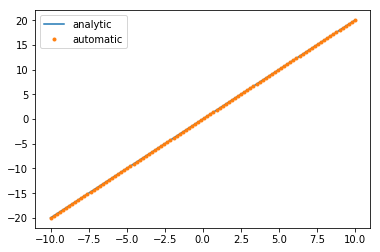

In [64]:
plt.plot(x,dp2, label='analytic')
plt.plot(x,dp2_,'.',label='automatic')
plt.legend()

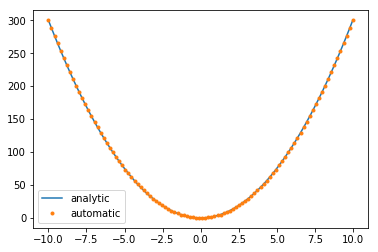

In [65]:
plt.plot(x,dp3, label='analytic')
plt.plot(x,dp3_,'.',label='automatic')
plt.legend()

Voilà, on a terminé, maintenant on sait comment différentier des fonctions simples avec pytorch.